## Lesson: Search algorithms

We will cover:
1. Bredth first search algorithm 
2. Depth first search algorithm 
3. Algorithm for finding shortest path in the graph
4. Uniform cost search algorithm
5. Minimum Spanning Tree of a given connected, undirected and weighted graph

## 1. Bredth first search algorithm

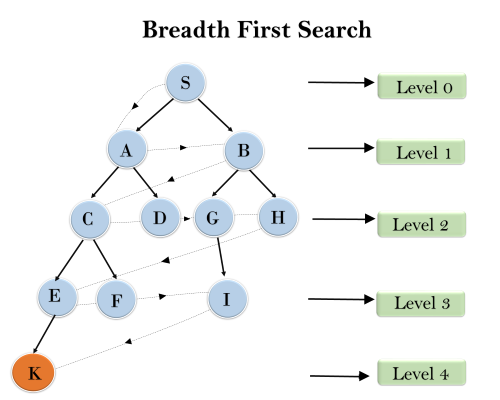

1.1. Write the bredth first search algorithm for the graph shown in the figure above.

**Solution**

First we need to define the graph

What are the input variables? Graph, start node and goal node

We will use dictionary for storing the graph nodes and edges. We will store information as a link list. 

In [1]:
graph = {'S': ['A','B'], 'A': ['C', 'D'], 'B':['G','H'], 'C':['E','F'], 'D':[], 'E':['K'], 'G':['I'], 'H':[], 'I':[],'F':[],'K':[]}

In [2]:
graph

{'S': ['A', 'B'],
 'A': ['C', 'D'],
 'B': ['G', 'H'],
 'C': ['E', 'F'],
 'D': [],
 'E': ['K'],
 'G': ['I'],
 'H': [],
 'I': [],
 'F': [],
 'K': []}

1. Put the starting node on the queue
2. If the queue is empty then return FAILURE and STOP
3. If the first element on the queue is goal node then return SUCCESS
4. Otherwise, remove and expand the first element from the queue and place all the children at the end of the queue
5. Return to step 2

In [3]:
def BFS(graph,start,goal):
    queue=[]
    queue.append(start)
    visited=[]
    if start==goal:
        return "Start node is the same as goal node"
        #our code will run until queue is empty
    else:
        while queue:
            current=queue.pop()
            for v in graph[current]:
                if not v in visited:
                    queue.insert(0,v)
            visited.append(current)
            if current==goal:
                break
        return visited
        

In [4]:
BFS(graph,'S','A')

['S', 'A']

1.2. We will add a singltone node 'L', node that is not connected to any other node in the network. What will happend if the start node is 'S' and goal node is 'L'.   

In [5]:
graph['L']=[]

In [6]:
graph

{'S': ['A', 'B'],
 'A': ['C', 'D'],
 'B': ['G', 'H'],
 'C': ['E', 'F'],
 'D': [],
 'E': ['K'],
 'G': ['I'],
 'H': [],
 'I': [],
 'F': [],
 'K': [],
 'L': []}

In [7]:
BFS(graph,'S','L')

['S', 'A', 'B', 'C', 'D', 'G', 'H', 'E', 'F', 'I', 'K']

The algorithm does not see that graph is disconnected. So we need to update the algorithm.

In [8]:
def BFS(graph,start,goal):
    queue=[]
    queue.append(start)
    visited=[]
    if start==goal:
        return "Start node is the same as goal node"
        #our code will run until queue is empty
    else:
        while queue:
            current=queue.pop()
            for v in graph[current]:
                if not v in visited:
                    queue.insert(0,v)
            visited.append(current)
            if current==goal:
                break
        if current==goal:
            return visited
        else:
            print("Node "+goal+" is unreachable from node "+start)
        

In [9]:
BFS(graph,'S','K')

['S', 'A', 'B', 'C', 'D', 'G', 'H', 'E', 'F', 'I', 'K']

1.3. How much time algorithm need to find path from 'S' to 'A' and 'S' to 'B'? Do you see the difference? Can you explain why? 

In [10]:
%%time
BFS(graph,'S','A')

CPU times: user 11 µs, sys: 3 µs, total: 14 µs
Wall time: 18.4 µs


['S', 'A']

In [11]:
%%time
BFS(graph,'S','B')

CPU times: user 17 µs, sys: 4 µs, total: 21 µs
Wall time: 25.7 µs


['S', 'A', 'B']

It takes more time to algorithm to reach the node 'B' than the node 'A', despite the fact that both nodes are at the same level. The time depends on how we listed neighbours of node 'S'

### 2. Depth first search algorithm

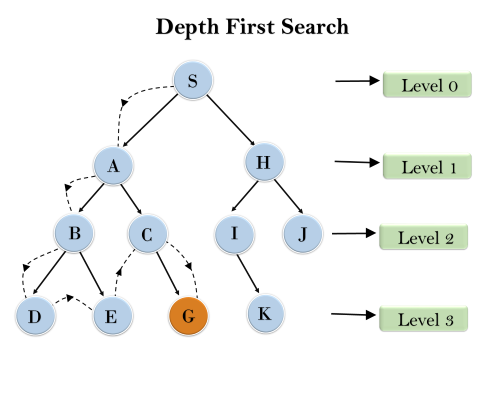

2.1. Write the depth first search algorithm for the graph shown in the figure above.

In [12]:
graph1={'S': ['H','A'], 'A': ['C', 'B'], 'B':['E','D'], 'C':['G'], 'H':['I','J'], 'I':['K'], 'G':[], 'E':[], 'D':[],'K':[],'J':[]}

In [13]:
graph1

{'S': ['H', 'A'],
 'A': ['C', 'B'],
 'B': ['E', 'D'],
 'C': ['G'],
 'H': ['I', 'J'],
 'I': ['K'],
 'G': [],
 'E': [],
 'D': [],
 'K': [],
 'J': []}

In [14]:
def DFS(graph,start,goal):
    stack=[]
    stack.append(start)
    visited=[]
    if start==goal:
        return "Start node is the same as goal node"
        #our code will run until queue is empty
    else:
        while stack:
            current=stack.pop()
            for v in graph[current]:
                if v not in visited:
                    stack.append(v)
            visited.append(current)
            if current==goal:
                break
        if current==goal:
            return visited
        else:
            print("Node "+goal+" is unreachable from node "+start)

In [15]:
DFS(graph1,'S','G')

['S', 'A', 'B', 'D', 'E', 'C', 'G']

2.2. Test DFS on the graph from assigment 1. What do you notice?

In [16]:
DFS(graph,'S','K')

['S', 'B', 'H', 'G', 'I', 'A', 'D', 'C', 'F', 'E', 'K']

In [17]:
%%time
DFS(graph,'S','K')

CPU times: user 15 µs, sys: 4 µs, total: 19 µs
Wall time: 21.5 µs


['S', 'B', 'H', 'G', 'I', 'A', 'D', 'C', 'F', 'E', 'K']

In [18]:
%%time
BFS(graph,'S','K')

CPU times: user 16 µs, sys: 4 µs, total: 20 µs
Wall time: 23.6 µs


['S', 'A', 'B', 'C', 'D', 'G', 'H', 'E', 'F', 'I', 'K']

In [19]:
DFS(graph,'K','S')

Node S is unreachable from node K


### 3. Algorithm for finding shortest path in the graph

3.1. Turn graph from assigment 1 to undirected graph and add link between nodes 'D' and 'G'. Test the performance of BFS and DFS on this graph. What do you notice?

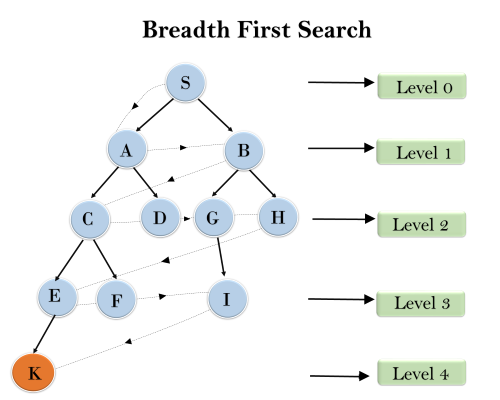

In [20]:
graph = {'S': ['A','B'], 'A': ['C', 'D'], 'B':['G','H'], 'C':['E','F'], 'D':[], 'E':['K'], 'G':['I'], 'H':[], 'I':[],'F':[],'K':[]}

In [21]:
for v in graph:
    for u in graph[v]:
        if v not in graph[u]:
            graph[u].append(v)

In [22]:
graph['D'].append('G')
graph['G'].append('D')

In [23]:
graph

{'S': ['A', 'B'],
 'A': ['C', 'D', 'S'],
 'B': ['G', 'H', 'S'],
 'C': ['E', 'F', 'A'],
 'D': ['A', 'G'],
 'E': ['K', 'C'],
 'G': ['I', 'B', 'D'],
 'H': ['B'],
 'I': ['G'],
 'F': ['C'],
 'K': ['E']}

3.2. Write a code based on breadth first search.

In [24]:
def BFS_SP(graph, start, goal):
    visited = []
    queue = [[start]]
    if start == goal:
        print("Same Node")
        return
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in visited:
            neighbours = graph[node]
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                #print(queue)
                if neighbour == goal:
                    return new_path
            visited.append(node)
    return

In [25]:
BFS_SP(graph,'S','I')

['S', 'B', 'G', 'I']

3.3. What is the average shortest path of this graph?

In [26]:
paths={}
for v in graph.keys():
    paths[v]=[]
    for u in graph.keys():
        if v!=u:
            paths[v].append(BFS_SP(graph,v,u))
    

In [27]:
paths

{'S': [['S', 'A'],
  ['S', 'B'],
  ['S', 'A', 'C'],
  ['S', 'A', 'D'],
  ['S', 'A', 'C', 'E'],
  ['S', 'B', 'G'],
  ['S', 'B', 'H'],
  ['S', 'B', 'G', 'I'],
  ['S', 'A', 'C', 'F'],
  ['S', 'A', 'C', 'E', 'K']],
 'A': [['A', 'S'],
  ['A', 'S', 'B'],
  ['A', 'C'],
  ['A', 'D'],
  ['A', 'C', 'E'],
  ['A', 'D', 'G'],
  ['A', 'S', 'B', 'H'],
  ['A', 'D', 'G', 'I'],
  ['A', 'C', 'F'],
  ['A', 'C', 'E', 'K']],
 'B': [['B', 'S'],
  ['B', 'S', 'A'],
  ['B', 'S', 'A', 'C'],
  ['B', 'G', 'D'],
  ['B', 'S', 'A', 'C', 'E'],
  ['B', 'G'],
  ['B', 'H'],
  ['B', 'G', 'I'],
  ['B', 'S', 'A', 'C', 'F'],
  ['B', 'S', 'A', 'C', 'E', 'K']],
 'C': [['C', 'A', 'S'],
  ['C', 'A'],
  ['C', 'A', 'S', 'B'],
  ['C', 'A', 'D'],
  ['C', 'E'],
  ['C', 'A', 'D', 'G'],
  ['C', 'A', 'S', 'B', 'H'],
  ['C', 'A', 'D', 'G', 'I'],
  ['C', 'F'],
  ['C', 'E', 'K']],
 'D': [['D', 'A', 'S'],
  ['D', 'A'],
  ['D', 'G', 'B'],
  ['D', 'A', 'C'],
  ['D', 'A', 'C', 'E'],
  ['D', 'G'],
  ['D', 'G', 'B', 'H'],
  ['D', 'G', 'I'],
  ['

In [28]:
sum=0
for v in paths.keys():
    for se in paths[v]:
        sum=sum+len(se)-1
N=len(paths.keys())
print("The average shortest path is:", (1.0*sum)/(1.0*N*(N-1)))

The average shortest path is: 2.8


### 4. Uniform cost search algorithm

4.1 Write the uniform cost searh algorithm fro weighted graph from the image below.

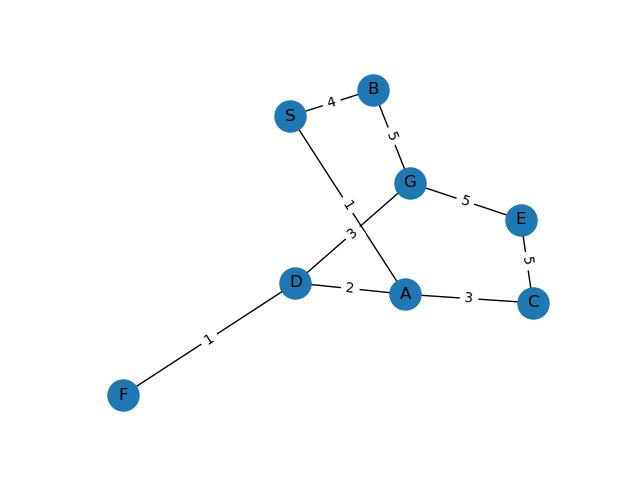

We need two variables: graph - edge list, and cost - cost or weight of the edge between two nodes.

In [29]:
graph2={}
graph2['S']=['A','B']
graph2['A']=['C','D', 'S']
graph2['B']=['G', 'S']
graph2['C']=['E', 'G']
graph2['E']=['G', 'B',]
graph2['D']=['F','G', 'A']
graph2['F']=['D']
graph2['G']=['B','E','D']

In [30]:
cost={}
for v in graph2.keys():
    cost[v]={}
    for u in graph2[v]:
        cost[v][u]=0

In [31]:
cost['S']['A']=1
cost['A']['S']=1
cost['S']['B']=4
cost['B']['S']=4
cost['A']['C']=3
cost['C']['A']=3
cost['A']['D']=2
cost['D']['A']=2
cost['C']['E']=5
cost['E']['C']=5
cost['C']['G']=5
cost['G']['C']=5
cost['D']['F']=1
cost['F']['D']=1
cost['D']['G']=3
cost['G']['D']=3
cost['B']['G']=5
cost['G']['B']=5
cost['E']['G']=5
cost['G']['E']=5

In [32]:
cost

{'S': {'A': 1, 'B': 4},
 'A': {'C': 3, 'D': 2, 'S': 1},
 'B': {'G': 5, 'S': 4},
 'C': {'E': 5, 'G': 5, 'A': 3},
 'E': {'G': 5, 'B': 0, 'C': 5},
 'D': {'F': 1, 'G': 3, 'A': 2},
 'F': {'D': 1},
 'G': {'B': 5, 'E': 5, 'D': 3, 'C': 5}}

We will use Priority Queue. It will always select the path with the smallest cost.

In [33]:
from queue import PriorityQueue
queue = PriorityQueue()
queue.put((0,[1]))
queue.put((4,[1,4]))
path=queue.get()
print(path)

(0, [1])


In [34]:
queue.put((2,[1,2,4]))

In [35]:
path=queue.get()
print(path)

(2, [1, 2, 4])


In [36]:
def ucs(graph, cost, start, goal):
    visited=[]
    # create a priority queue of paths
    queue = PriorityQueue()
    queue.put((0, [start]))
    # iterate over the items in the queue
    while not queue.empty():
        # get the highest priority item
        pair = queue.get()
        current = pair[1][-1]
        
        # if it's the goal, return
        if current == goal:
            return pair[1]
        # add all the edges to the priority queue
        for v in graph[current]:
            if v not in visited:
                # create a new path with the node from the edge
                new_path = list(pair[1])
                new_path.append(v)
                # append the new path to the queue with the edges priority
                queue.put((pair[0] + cost[current][v], new_path))
            if v==goal:
                return new_path
        visited.append(current)

In [37]:
graph3={}
graph3[1]=[2,3]
graph3[2]=[1,4]
graph3[3]=[1,4,5]
graph3[4]=[2,3]
graph3[5]=[3]
cost1={}
for i in range(1,6):
    cost1[i]={}
cost1[1][2]=1
cost1[1][3]=4
cost1[2][1]=1
cost1[2][4]=1
cost1[3][1]=4
cost1[3][5]=3
cost1[3][4]=1
cost1[4][2]=1
cost1[4][3]=1
cost1[5][3]=3

In [38]:
ucs(graph3,cost1,1,5)

[1, 2, 4, 3, 5]

2.2. Find the path with the smallest weight between nodes 'S' and 'G'.

In [39]:
cost['S']['A']

1

In [40]:
ucs(graph2,cost,'S','G')

['S', 'A', 'D', 'G']

2.3. What would happen if we set the weight of the links between nodes 'B' and 'S' and 'B' and 'G' to be equal 1.

In [41]:
cost['S']['B']=1
cost['B']['S']=1
cost['B']['G']=1
cost['G']['B']=1

In [42]:
ucs(graph2,cost,'S','G')

['S', 'B', 'G']

### 5. Minimum Spanning Tree of a given connected, undirected and weighted graph

5.1 Write an algorithm for find a minimun spanning tree of connected, undirected and weighted graph given in the previous task. **Minimum spanning tree** is a subset of the edges of a connected, edge-weighted undirected graph that connects all the vertices together, without any cycles and with the minimum possible total edge weight. 

In [43]:
graph2={}
graph2['S']=['A','B']
graph2['A']=['C','D', 'S']
graph2['B']=['G', 'S']
graph2['C']=['E', 'G']
graph2['E']=['G', 'B',]
graph2['D']=['F','G', 'A']
graph2['F']=['D']
graph2['G']=['B','E','D']

In [44]:
cost={}
for v in graph2.keys():
    cost[v]={}
    for u in graph2[v]:
        cost[v][u]=0

In [45]:
cost['S']['A']=1
cost['A']['S']=1
cost['S']['B']=4
cost['B']['S']=4
cost['A']['C']=3
cost['C']['A']=3
cost['A']['D']=2
cost['D']['A']=2
cost['C']['E']=5
cost['E']['C']=5
cost['C']['G']=5
cost['G']['C']=5
cost['D']['F']=1
cost['F']['D']=1
cost['D']['G']=3
cost['G']['D']=3
cost['B']['G']=5
cost['G']['B']=5
cost['E']['G']=5
cost['G']['E']=5

Algorithm for finding mininum spanning tree is known as Kruskal's algorithm. <br>
Algorithm steps:<br>     
1. Sort all the edges in non-decreasing order of their weight. 
2. Initialize parent and size arrays with the length of the total number of nodes.
3. Initialize a variable edgeCount to 0
4. Pick the smallest edge<br>
    4.a find root parent and check if two nodes are in the same tree root1 == root2?<br>
    4.b merge the smaller tree to the larger tree<br>
    4.c increment the size of the larger tree by 1<br>
    4.d increment edgeCount by 1 if return true<br>

In [46]:
def mst(graph):
    N=len(graph2.keys())
    nodes=[]
    for v in graph2.keys():
        nodes.append(v)
    edges={}
    w={}
    k=1
    for i in range(0,len(nodes)):
        v=nodes[i]
        for j in range(i+1,len(nodes)):
            u=nodes[j]
            if u in graph2[v]:
                edges[k]=(v,u)
                w[k]=cost[v][u]
                k+=1
    sorted_w = sorted(w.items(), key=lambda x:x[1])
    parent={}
    size={}
    for v in graph.keys():
        parent[v]=v
        size[v]=1
    k=0
    L=0
    tree=[]
    tree_nodes=[]
    while L<(N-2):
        v=edges[sorted_w[k][0]][0]
        u=edges[sorted_w[k][0]][1]
        root1=parent[v]
        root2=parent[u]
        if root1!=root2:
            if size[root1]>size[root2]:
                parent[root2]=root1
                size[root1]+=1
                tree.append(sorted_w[k][0])
                k+=1
                L+=1
            else:
                parent[root1]=root2
                size[root2]+=1
                tree.append(sorted_w[k][0])
                k+=1
                L+=1
        else:
            k+=1
    treeG=[]
    total_w=0
    for k in tree:
        treeG.append(edges[k])
        total_w=total_w+w[k]
    return treeG, total_w

In [47]:
mst(graph2)

([('S', 'A'), ('D', 'F'), ('A', 'D'), ('A', 'C'), ('D', 'G'), ('S', 'B')], 14)

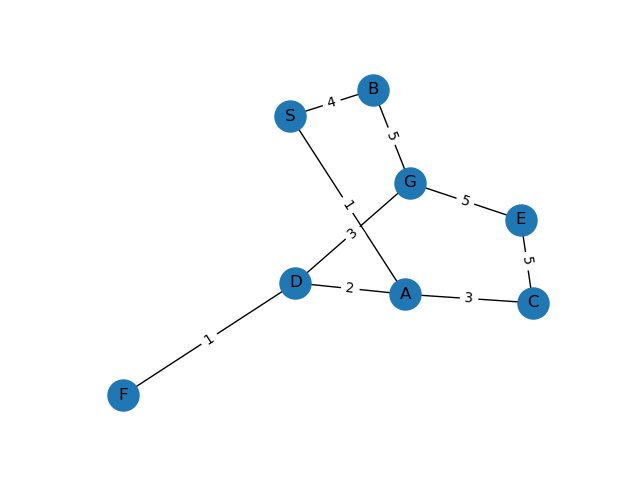

### 5. Homework

Write PEAS for Autonomous Mars rover. Submit your answer in the following form:<br>
Performance Measure: your answer<br>
Environment: your answer<br>
Actuators: your answer <br>
Sensors: your answer <br>

Submission link: https://forms.gle/NbGfMep8nkCuNeUx5

**Deadline:** 21 April 2023 6 PM CET